<a href="https://colab.research.google.com/github/RishikaVerma21/Measure-Size-of-object/blob/main/Measure_Size_of_object.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing a library that is not in Colaboratory

In [45]:
import cv2

In [46]:
import argparse

In [47]:
import imutils

In [48]:
from scipy.spatial import distance as dist

In [49]:
from imutils import perspective

In [50]:
from imutils import contours

In [51]:
import numpy as np

In [67]:
#pip install tensorflow-object-detection-api

**Imported object detector module so we select all from object detector module**

In [66]:
#!pip install object_detector

In [68]:
from object_detector import *

In [69]:
img = cv2.imread("/content/drive/MyDrive/phone2.jpg")

In [70]:
print(img.shape)

(451, 442, 3)


In [71]:
from google.colab.patches import cv2_imshow

In [72]:
#!pip install pillow==4.1.1
%reload_ext autoreload
%autoreload

In [73]:
# workaround 
from PIL import Image
def register_extension(id, extension): Image.EXTENSION[extension.lower()] = id.upper()
Image.register_extension = register_extension
def register_extensions(id, extensions): 
  for extension in extensions: register_extension(id, extension)
Image.register_extensions = register_extensions

In [61]:
#!pip install -U pillow

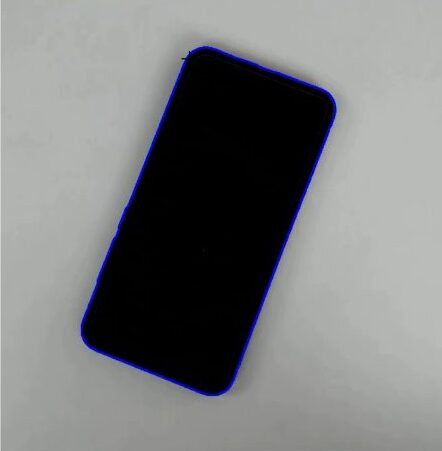

In [75]:
cv2_imshow(img)

In [76]:
cv2.waitKey(0)

-1

In [79]:
#cv2.imshow("image", img)

In [80]:
#detector = HomogeneousBgDetector()